<h1>ENB38 - CNNs</h1>
<h2>pool size</h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [27]:
net1 = models.Sequential()
net1.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net1.add(layers.MaxPooling1D(pool_size=2))
net1.add(layers.Flatten())
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 239, 48)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 11472)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 80311     
Total params: 80,935
Trainable params: 80,935
Non-trainable params: 0
_________________________________________________________________


In [28]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [29]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 0s 2ms/step - loss: 2.0439 - accuracy: 0.1852 - val_loss: 1.8181 - val_accuracy: 0.1111
Epoch 2/100
54/54 [==============================] - 0s 295us/step - loss: 1.8200 - accuracy: 0.2222 - val_loss: 1.6846 - val_accuracy: 0.3333
Epoch 3/100
54/54 [==============================] - 0s 278us/step - loss: 1.7932 - accuracy: 0.3148 - val_loss: 1.6672 - val_accuracy: 0.4444
Epoch 4/100
54/54 [==============================] - 0s 278us/step - loss: 1.7163 - accuracy: 0.3148 - val_loss: 1.6057 - val_accuracy: 0.5000
Epoch 5/100
54/54 [==============================] - 0s 278us/step - loss: 1.5555 - accuracy: 0.5000 - val_loss: 1.5949 - val_accuracy: 0.2222
Epoch 6/100
54/54 [==============================] - 0s 278us/step - loss: 1.4663 - accuracy: 0.5370 - val_loss: 1.5828 - val_accuracy: 0.5000
Epoch 7/100
54/54 [==============================] - 0s 259us/step - loss: 1.3899 - accuracy: 0.59

Epoch 13/100
54/54 [==============================] - 0s 278us/step - loss: 0.8768 - accuracy: 0.8333 - val_loss: 0.9921 - val_accuracy: 0.7222
Epoch 14/100
54/54 [==============================] - 0s 259us/step - loss: 0.8438 - accuracy: 0.8148 - val_loss: 0.9636 - val_accuracy: 0.6111
Epoch 15/100
54/54 [==============================] - 0s 260us/step - loss: 0.7648 - accuracy: 0.7963 - val_loss: 0.8906 - val_accuracy: 0.7778
Epoch 16/100
54/54 [==============================] - 0s 278us/step - loss: 0.7058 - accuracy: 0.8148 - val_loss: 0.8649 - val_accuracy: 0.6667
Epoch 17/100
54/54 [==============================] - 0s 259us/step - loss: 0.7037 - accuracy: 0.7222 - val_loss: 0.8308 - val_accuracy: 0.7222
Epoch 18/100
54/54 [==============================] - 0s 278us/step - loss: 0.6222 - accuracy: 0.8889 - val_loss: 0.8141 - val_accuracy: 0.8889
Epoch 19/100
54/54 [==============================] - 0s 259us/step - loss: 0.5804 - accuracy: 0.9444 - val_loss: 0.8110 - val_accuracy:

54/54 [==============================] - 0s 278us/step - loss: 0.3928 - accuracy: 0.9815 - val_loss: 0.8067 - val_accuracy: 0.6111
Epoch 26/100
54/54 [==============================] - 0s 297us/step - loss: 0.3895 - accuracy: 0.9630 - val_loss: 0.8129 - val_accuracy: 0.6111
Epoch 27/100
54/54 [==============================] - 0s 278us/step - loss: 0.3598 - accuracy: 0.9815 - val_loss: 0.7307 - val_accuracy: 0.6667
Epoch 28/100
54/54 [==============================] - 0s 259us/step - loss: 0.3339 - accuracy: 0.9815 - val_loss: 0.7130 - val_accuracy: 0.7778
Epoch 29/100
54/54 [==============================] - 0s 278us/step - loss: 0.3227 - accuracy: 0.9630 - val_loss: 0.7224 - val_accuracy: 0.6667
Epoch 30/100
54/54 [==============================] - 0s 259us/step - loss: 0.3022 - accuracy: 0.9815 - val_loss: 0.7404 - val_accuracy: 0.6111
Epoch 31/100
54/54 [==============================] - 0s 297us/step - loss: 0.2963 - accuracy: 0.9815 - val_loss: 0.7272 - val_accuracy: 0.6111
Epoch

Epoch 82/100
54/54 [==============================] - 0s 278us/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.6170 - val_accuracy: 0.6667
Epoch 83/100
54/54 [==============================] - 0s 278us/step - loss: 0.0492 - accuracy: 1.0000 - val_loss: 0.6217 - val_accuracy: 0.6667
Epoch 84/100
54/54 [==============================] - 0s 297us/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.6162 - val_accuracy: 0.6667
Epoch 85/100
54/54 [==============================] - 0s 297us/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 0.6181 - val_accuracy: 0.6667
Epoch 86/100
54/54 [==============================] - 0s 297us/step - loss: 0.0464 - accuracy: 1.0000 - val_loss: 0.6245 - val_accuracy: 0.6667
Epoch 87/100
54/54 [==============================] - 0s 315us/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.6262 - val_accuracy: 0.6667
Epoch 88/100
54/54 [==============================] - 0s 315us/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 0.6328 - val_accuracy:

Epoch 38/100
54/54 [==============================] - 0s 259us/step - loss: 0.1428 - accuracy: 1.0000 - val_loss: 1.1067 - val_accuracy: 0.6111
Epoch 39/100
54/54 [==============================] - 0s 278us/step - loss: 0.1349 - accuracy: 1.0000 - val_loss: 1.0784 - val_accuracy: 0.6111
Epoch 40/100
54/54 [==============================] - 0s 278us/step - loss: 0.1275 - accuracy: 1.0000 - val_loss: 1.0632 - val_accuracy: 0.6667
Epoch 41/100
54/54 [==============================] - 0s 278us/step - loss: 0.1208 - accuracy: 1.0000 - val_loss: 1.0777 - val_accuracy: 0.6667
Epoch 42/100
54/54 [==============================] - 0s 278us/step - loss: 0.1151 - accuracy: 1.0000 - val_loss: 1.0888 - val_accuracy: 0.6667
Epoch 43/100
54/54 [==============================] - 0s 278us/step - loss: 0.1107 - accuracy: 1.0000 - val_loss: 1.1086 - val_accuracy: 0.6667
Epoch 44/100
54/54 [==============================] - 0s 259us/step - loss: 0.1054 - accuracy: 1.0000 - val_loss: 1.0956 - val_accuracy:

Epoch 95/100
54/54 [==============================] - 0s 278us/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 1.2722 - val_accuracy: 0.6111
Epoch 96/100
54/54 [==============================] - 0s 278us/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.2842 - val_accuracy: 0.6111
Epoch 97/100
54/54 [==============================] - 0s 278us/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 1.2886 - val_accuracy: 0.6667
Epoch 98/100
54/54 [==============================] - 0s 259us/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 1.2814 - val_accuracy: 0.6667
Epoch 99/100
54/54 [==============================] - 0s 278us/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 1.2750 - val_accuracy: 0.6667
Epoch 100/100
15/15 [==============================] - 0s 133us/step
[0.5279138088226318, 0.800000011920929]


In [30]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.62273934 0.75000001]
Standard deviation for loss & accuracy:  [0.09925075 0.05527708]
Duration in seconds:  6


In [31]:
net1.save('enb38-1.h5')

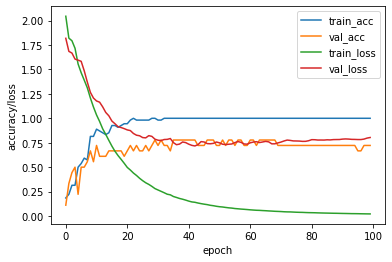

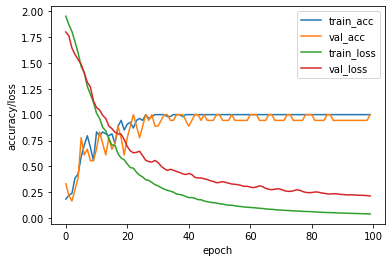

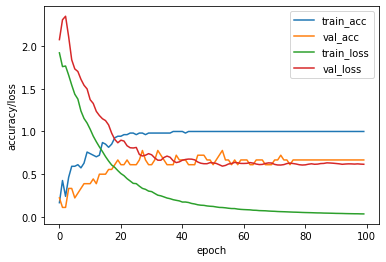

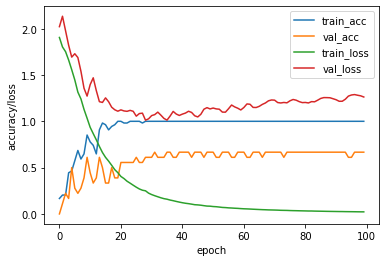

In [32]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [33]:
net2 = models.Sequential()
net2.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net2.add(layers.MaxPooling1D(pool_size=4))
net2.add(layers.Flatten())
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 119, 48)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5712)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 39991     
Total params: 40,615
Trainable params: 40,615
Non-trainable params: 0
_________________________________________________________________


In [34]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [35]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 0s 3ms/step - loss: 1.9783 - accuracy: 0.1481 - val_loss: 1.7913 - val_accuracy: 0.1667
Epoch 2/100
54/54 [==============================] - 0s 241us/step - loss: 1.8818 - accuracy: 0.1481 - val_loss: 1.7577 - val_accuracy: 0.1667
Epoch 3/100
54/54 [==============================] - 0s 222us/step - loss: 1.8052 - accuracy: 0.1852 - val_loss: 1.7599 - val_accuracy: 0.1667
Epoch 4/100
54/54 [==============================] - 0s 241us/step - loss: 1.7482 - accuracy: 0.2778 - val_loss: 1.7365 - val_accuracy: 0.1111
Epoch 5/100
54/54 [==============================] - 0s 241us/step - loss: 1.6938 - accuracy: 0.1852 - val_loss: 1.6776 - val_accuracy: 0.1111
Epoch 6/100
54/54 [==============================] - 0s 241us/step - loss: 1.6257 - accuracy: 0.3333 - val_loss: 1.6088 - val_accuracy: 0.3889
Epoch 7/100
54/54 [==============================] - 0s 241us/step - loss: 1.5493 - accuracy: 0.57

54/54 [==============================] - 0s 241us/step - loss: 1.2582 - accuracy: 0.6481 - val_loss: 1.3086 - val_accuracy: 0.5556
Epoch 14/100
54/54 [==============================] - 0s 241us/step - loss: 1.1943 - accuracy: 0.6667 - val_loss: 1.2472 - val_accuracy: 0.6111
Epoch 15/100
54/54 [==============================] - 0s 223us/step - loss: 1.1394 - accuracy: 0.6852 - val_loss: 1.1903 - val_accuracy: 0.8333
Epoch 16/100
54/54 [==============================] - 0s 222us/step - loss: 1.0858 - accuracy: 0.8148 - val_loss: 1.1416 - val_accuracy: 0.8333
Epoch 17/100
54/54 [==============================] - 0s 222us/step - loss: 1.0354 - accuracy: 0.7963 - val_loss: 1.0939 - val_accuracy: 0.6667
Epoch 18/100
54/54 [==============================] - 0s 222us/step - loss: 0.9892 - accuracy: 0.6667 - val_loss: 1.0591 - val_accuracy: 0.7222
Epoch 19/100
54/54 [==============================] - 0s 222us/step - loss: 0.9484 - accuracy: 0.6852 - val_loss: 1.0360 - val_accuracy: 0.7778
Epoch

Epoch 70/100
54/54 [==============================] - 0s 241us/step - loss: 0.2132 - accuracy: 1.0000 - val_loss: 0.3923 - val_accuracy: 0.9444
Epoch 71/100
54/54 [==============================] - 0s 222us/step - loss: 0.2085 - accuracy: 1.0000 - val_loss: 0.3839 - val_accuracy: 0.9444
Epoch 72/100
54/54 [==============================] - 0s 241us/step - loss: 0.2025 - accuracy: 1.0000 - val_loss: 0.3743 - val_accuracy: 1.0000
Epoch 73/100
54/54 [==============================] - 0s 222us/step - loss: 0.1989 - accuracy: 1.0000 - val_loss: 0.3684 - val_accuracy: 1.0000
Epoch 74/100
54/54 [==============================] - 0s 241us/step - loss: 0.1946 - accuracy: 1.0000 - val_loss: 0.3661 - val_accuracy: 0.9444
Epoch 75/100
54/54 [==============================] - 0s 241us/step - loss: 0.1899 - accuracy: 1.0000 - val_loss: 0.3656 - val_accuracy: 0.9444
Epoch 76/100
54/54 [==============================] - 0s 241us/step - loss: 0.1860 - accuracy: 1.0000 - val_loss: 0.3606 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 0s 222us/step - loss: 0.7293 - accuracy: 0.7963 - val_loss: 1.0141 - val_accuracy: 0.6667
Epoch 27/100
54/54 [==============================] - 0s 241us/step - loss: 0.7154 - accuracy: 0.8704 - val_loss: 0.9667 - val_accuracy: 0.7778
Epoch 28/100
54/54 [==============================] - 0s 241us/step - loss: 0.6787 - accuracy: 0.9259 - val_loss: 0.9481 - val_accuracy: 0.6667
Epoch 29/100
54/54 [==============================] - 0s 241us/step - loss: 0.6494 - accuracy: 0.9259 - val_loss: 0.9480 - val_accuracy: 0.6111
Epoch 30/100
54/54 [==============================] - 0s 222us/step - loss: 0.6326 - accuracy: 0.8889 - val_loss: 0.9514 - val_accuracy: 0.5556
Epoch 31/100
54/54 [==============================] - 0s 222us/step - loss: 0.6094 - accuracy: 0.8333 - val_loss: 0.9227 - val_accuracy: 0.6111
Epoch 32/100
54/54 [==============================] - 0s 222us/step - loss: 0.5866 - accuracy: 0.9259 - val_loss: 0.8767 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 0s 241us/step - loss: 0.1420 - accuracy: 1.0000 - val_loss: 0.5429 - val_accuracy: 0.7778
Epoch 84/100
54/54 [==============================] - 0s 241us/step - loss: 0.1391 - accuracy: 1.0000 - val_loss: 0.5311 - val_accuracy: 0.7778
Epoch 85/100
54/54 [==============================] - 0s 222us/step - loss: 0.1392 - accuracy: 1.0000 - val_loss: 0.5275 - val_accuracy: 0.7778
Epoch 86/100
54/54 [==============================] - 0s 241us/step - loss: 0.1325 - accuracy: 1.0000 - val_loss: 0.5330 - val_accuracy: 0.7222
Epoch 87/100
54/54 [==============================] - 0s 222us/step - loss: 0.1294 - accuracy: 1.0000 - val_loss: 0.5431 - val_accuracy: 0.7778
Epoch 88/100
54/54 [==============================] - 0s 222us/step - loss: 0.1271 - accuracy: 1.0000 - val_loss: 0.5427 - val_accuracy: 0.7778
Epoch 89/100
54/54 [==============================] - 0s 241us/step - loss: 0.1251 - accuracy: 1.0000 - val_loss: 0.5343 - val_accuracy:

Epoch 39/100
54/54 [==============================] - 0s 222us/step - loss: 0.3740 - accuracy: 1.0000 - val_loss: 0.9882 - val_accuracy: 0.6111
Epoch 40/100
54/54 [==============================] - 0s 222us/step - loss: 0.3563 - accuracy: 1.0000 - val_loss: 0.9647 - val_accuracy: 0.6111
Epoch 41/100
54/54 [==============================] - 0s 241us/step - loss: 0.3436 - accuracy: 1.0000 - val_loss: 0.9376 - val_accuracy: 0.6111
Epoch 42/100
54/54 [==============================] - 0s 223us/step - loss: 0.3307 - accuracy: 1.0000 - val_loss: 0.9433 - val_accuracy: 0.6111
Epoch 43/100
54/54 [==============================] - 0s 204us/step - loss: 0.3181 - accuracy: 1.0000 - val_loss: 0.9684 - val_accuracy: 0.6111
Epoch 44/100
54/54 [==============================] - 0s 241us/step - loss: 0.3059 - accuracy: 1.0000 - val_loss: 0.9829 - val_accuracy: 0.6111
Epoch 45/100
54/54 [==============================] - 0s 222us/step - loss: 0.2942 - accuracy: 1.0000 - val_loss: 0.9912 - val_accuracy:

Epoch 96/100
54/54 [==============================] - 0s 241us/step - loss: 0.0755 - accuracy: 1.0000 - val_loss: 1.0387 - val_accuracy: 0.6111
Epoch 97/100
54/54 [==============================] - 0s 222us/step - loss: 0.0743 - accuracy: 1.0000 - val_loss: 1.0478 - val_accuracy: 0.6111
Epoch 98/100
54/54 [==============================] - 0s 244us/step - loss: 0.0731 - accuracy: 1.0000 - val_loss: 1.0542 - val_accuracy: 0.6111
Epoch 99/100
54/54 [==============================] - 0s 222us/step - loss: 0.0714 - accuracy: 1.0000 - val_loss: 1.0532 - val_accuracy: 0.6111
Epoch 100/100
15/15 [==============================] - 0s 133us/step
[0.44654518365859985, 0.800000011920929]


In [36]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [0.467539   0.78333335]
Standard deviation for loss & accuracy:  [0.0530607  0.05527708]
Duration in seconds:  6


In [37]:
net2.save('enb38-2.h5')

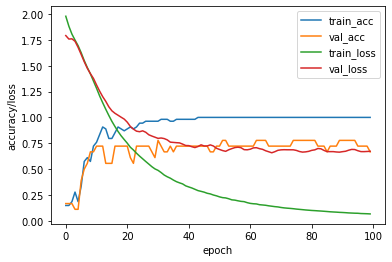

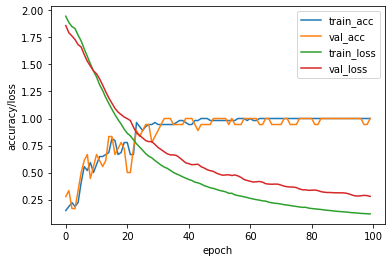

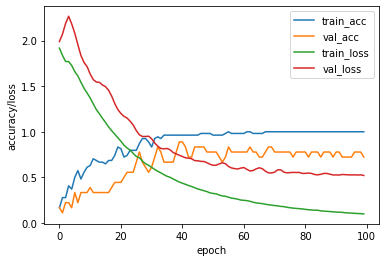

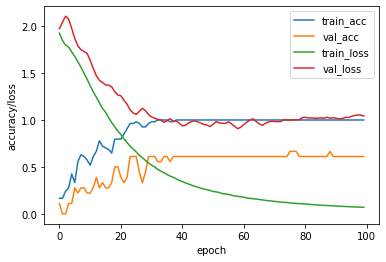

In [38]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [40]:
net3 = models.Sequential()
net3.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=8))
net3.add(layers.Flatten())
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 59, 48)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2832)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 19831     
Total params: 20,455
Trainable params: 20,455
Non-trainable params: 0
_________________________________________________________________


In [41]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 0s 3ms/step - loss: 1.9692 - accuracy: 0.0185 - val_loss: 1.8918 - val_accuracy: 0.2222
Epoch 2/100
54/54 [==============================] - 0s 416us/step - loss: 1.8853 - accuracy: 0.2222 - val_loss: 1.8212 - val_accuracy: 0.3333
Epoch 3/100
54/54 [==============================] - 0s 222us/step - loss: 1.8406 - accuracy: 0.3889 - val_loss: 1.7705 - val_accuracy: 0.2778
Epoch 4/100
54/54 [==============================] - 0s 204us/step - loss: 1.8008 - accuracy: 0.3333 - val_loss: 1.7289 - val_accuracy: 0.3333
Epoch 5/100
54/54 [==============================] - 0s 222us/step - loss: 1.7651 - accuracy: 0.3148 - val_loss: 1.6811 - val_accuracy: 0.3333
Epoch 6/100
54/54 [==============================] - 0s 241us/step - loss: 1.7210 - accuracy: 0.4259 - val_loss: 1.6341 - val_accuracy: 0.3333
Epoch 7/100
54/54 [==============================] - 0s 222us/step - loss: 1.6810 - accuracy: 0.46

54/54 [==============================] - 0s 222us/step - loss: 1.5174 - accuracy: 0.6111 - val_loss: 1.5024 - val_accuracy: 0.7778
Epoch 14/100
54/54 [==============================] - 0s 185us/step - loss: 1.4724 - accuracy: 0.7222 - val_loss: 1.4586 - val_accuracy: 0.7222
Epoch 15/100
54/54 [==============================] - 0s 204us/step - loss: 1.4325 - accuracy: 0.6852 - val_loss: 1.4141 - val_accuracy: 0.6667
Epoch 16/100
54/54 [==============================] - 0s 222us/step - loss: 1.3879 - accuracy: 0.6667 - val_loss: 1.3665 - val_accuracy: 0.7778
Epoch 17/100
54/54 [==============================] - 0s 222us/step - loss: 1.3449 - accuracy: 0.6852 - val_loss: 1.3262 - val_accuracy: 0.7778
Epoch 18/100
54/54 [==============================] - 0s 204us/step - loss: 1.3020 - accuracy: 0.6667 - val_loss: 1.2933 - val_accuracy: 0.7778
Epoch 19/100
54/54 [==============================] - 0s 204us/step - loss: 1.2616 - accuracy: 0.6296 - val_loss: 1.2631 - val_accuracy: 0.7222
Epoch

Epoch 70/100
54/54 [==============================] - 0s 204us/step - loss: 0.4169 - accuracy: 1.0000 - val_loss: 0.5525 - val_accuracy: 0.9444
Epoch 71/100
54/54 [==============================] - 0s 204us/step - loss: 0.4126 - accuracy: 1.0000 - val_loss: 0.5400 - val_accuracy: 0.9444
Epoch 72/100
54/54 [==============================] - 0s 204us/step - loss: 0.4058 - accuracy: 1.0000 - val_loss: 0.5322 - val_accuracy: 1.0000
Epoch 73/100
54/54 [==============================] - 0s 222us/step - loss: 0.3977 - accuracy: 0.9815 - val_loss: 0.5271 - val_accuracy: 1.0000
Epoch 74/100
54/54 [==============================] - 0s 204us/step - loss: 0.3905 - accuracy: 0.9815 - val_loss: 0.5272 - val_accuracy: 1.0000
Epoch 75/100
54/54 [==============================] - 0s 185us/step - loss: 0.3876 - accuracy: 0.9815 - val_loss: 0.5263 - val_accuracy: 1.0000
Epoch 76/100
54/54 [==============================] - 0s 187us/step - loss: 0.3779 - accuracy: 0.9815 - val_loss: 0.5141 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 0s 204us/step - loss: 1.0252 - accuracy: 0.7037 - val_loss: 1.3418 - val_accuracy: 0.3889
Epoch 27/100
54/54 [==============================] - 0s 204us/step - loss: 1.0022 - accuracy: 0.7407 - val_loss: 1.3058 - val_accuracy: 0.3889
Epoch 28/100
54/54 [==============================] - 0s 204us/step - loss: 0.9788 - accuracy: 0.7407 - val_loss: 1.2764 - val_accuracy: 0.5000
Epoch 29/100
54/54 [==============================] - 0s 222us/step - loss: 0.9543 - accuracy: 0.7407 - val_loss: 1.2559 - val_accuracy: 0.5556
Epoch 30/100
54/54 [==============================] - 0s 204us/step - loss: 0.9299 - accuracy: 0.7222 - val_loss: 1.2448 - val_accuracy: 0.5000
Epoch 31/100
54/54 [==============================] - 0s 185us/step - loss: 0.9124 - accuracy: 0.7222 - val_loss: 1.2350 - val_accuracy: 0.5000
Epoch 32/100
54/54 [==============================] - 0s 222us/step - loss: 0.8910 - accuracy: 0.7037 - val_loss: 1.2060 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 0s 204us/step - loss: 0.3387 - accuracy: 0.9815 - val_loss: 0.6256 - val_accuracy: 0.7778
Epoch 84/100
54/54 [==============================] - 0s 204us/step - loss: 0.3300 - accuracy: 0.9815 - val_loss: 0.6247 - val_accuracy: 0.7778
Epoch 85/100
54/54 [==============================] - 0s 204us/step - loss: 0.3234 - accuracy: 0.9815 - val_loss: 0.6303 - val_accuracy: 0.7778
Epoch 86/100
54/54 [==============================] - 0s 204us/step - loss: 0.3172 - accuracy: 0.9815 - val_loss: 0.6337 - val_accuracy: 0.7778
Epoch 87/100
54/54 [==============================] - 0s 222us/step - loss: 0.3178 - accuracy: 0.9815 - val_loss: 0.6392 - val_accuracy: 0.7778
Epoch 88/100
54/54 [==============================] - 0s 204us/step - loss: 0.3103 - accuracy: 1.0000 - val_loss: 0.6323 - val_accuracy: 0.7778
Epoch 89/100
54/54 [==============================] - 0s 204us/step - loss: 0.3028 - accuracy: 0.9815 - val_loss: 0.6138 - val_accuracy:

Epoch 39/100
54/54 [==============================] - 0s 204us/step - loss: 0.6817 - accuracy: 0.9259 - val_loss: 1.1173 - val_accuracy: 0.3333
Epoch 40/100
54/54 [==============================] - 0s 204us/step - loss: 0.6643 - accuracy: 0.8889 - val_loss: 1.1055 - val_accuracy: 0.3333
Epoch 41/100
54/54 [==============================] - 0s 204us/step - loss: 0.6441 - accuracy: 0.9444 - val_loss: 1.0773 - val_accuracy: 0.6111
Epoch 42/100
54/54 [==============================] - 0s 222us/step - loss: 0.6305 - accuracy: 0.9815 - val_loss: 1.0468 - val_accuracy: 0.6111
Epoch 43/100
54/54 [==============================] - 0s 185us/step - loss: 0.6135 - accuracy: 0.9815 - val_loss: 1.0401 - val_accuracy: 0.6111
Epoch 44/100
54/54 [==============================] - 0s 222us/step - loss: 0.6006 - accuracy: 0.9630 - val_loss: 1.0476 - val_accuracy: 0.5556
Epoch 45/100
54/54 [==============================] - 0s 204us/step - loss: 0.5830 - accuracy: 0.9815 - val_loss: 1.0401 - val_accuracy:

Epoch 96/100
54/54 [==============================] - 0s 222us/step - loss: 0.1930 - accuracy: 1.0000 - val_loss: 0.9832 - val_accuracy: 0.6111
Epoch 97/100
54/54 [==============================] - 0s 222us/step - loss: 0.1897 - accuracy: 1.0000 - val_loss: 0.9821 - val_accuracy: 0.6111
Epoch 98/100
54/54 [==============================] - 0s 204us/step - loss: 0.1859 - accuracy: 1.0000 - val_loss: 0.9778 - val_accuracy: 0.6111
Epoch 99/100
54/54 [==============================] - 0s 204us/step - loss: 0.1823 - accuracy: 1.0000 - val_loss: 0.9812 - val_accuracy: 0.6111
Epoch 100/100
15/15 [==============================] - 0s 133us/step
[0.47196897864341736, 0.800000011920929]


In [42]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.47898492 0.78333335]
Standard deviation for loss & accuracy:  [0.03598304 0.05527708]
Duration in seconds:  5


In [43]:
net3.save('enb38-3.h5')

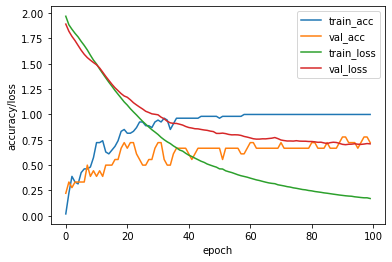

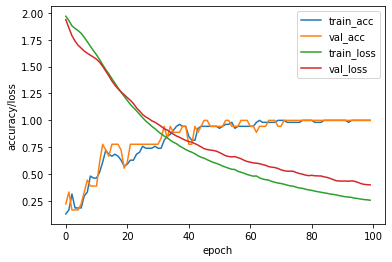

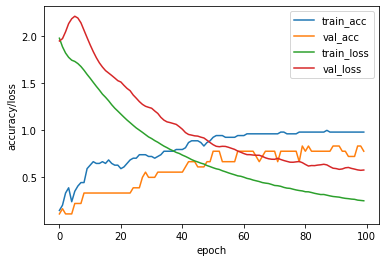

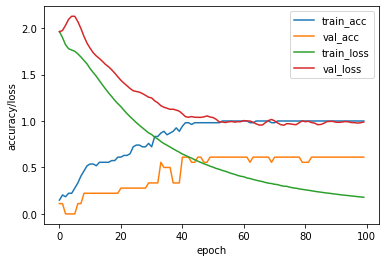

In [44]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [47]:
net4 = models.Sequential()
net4.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net4.add(layers.MaxPooling1D(pool_size=16))
net4.add(layers.Flatten())
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 29, 48)            0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1392)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 9751      
Total params: 10,375
Trainable params: 10,375
Non-trainable params: 0
_________________________________________________________________


In [48]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 0s 3ms/step - loss: 1.9719 - accuracy: 0.0926 - val_loss: 1.9109 - val_accuracy: 0.1667
Epoch 2/100
54/54 [==============================] - 0s 222us/step - loss: 1.9261 - accuracy: 0.1667 - val_loss: 1.8722 - val_accuracy: 0.1667
Epoch 3/100
54/54 [==============================] - 0s 222us/step - loss: 1.8957 - accuracy: 0.1667 - val_loss: 1.8404 - val_accuracy: 0.1667
Epoch 4/100
54/54 [==============================] - 0s 222us/step - loss: 1.8631 - accuracy: 0.1667 - val_loss: 1.8222 - val_accuracy: 0.1111
Epoch 5/100
54/54 [==============================] - 0s 222us/step - loss: 1.8472 - accuracy: 0.1852 - val_loss: 1.8040 - val_accuracy: 0.1111
Epoch 6/100
54/54 [==============================] - 0s 204us/step - loss: 1.8348 - accuracy: 0.1852 - val_loss: 1.7850 - val_accuracy: 0.1111
Epoch 7/100
54/54 [==============================] - 0s 222us/step - loss: 1.8176 - accuracy: 0.18

54/54 [==============================] - 0s 222us/step - loss: 1.7580 - accuracy: 0.4074 - val_loss: 1.6930 - val_accuracy: 0.4444
Epoch 14/100
54/54 [==============================] - 0s 222us/step - loss: 1.7390 - accuracy: 0.3519 - val_loss: 1.6826 - val_accuracy: 0.3889
Epoch 15/100
54/54 [==============================] - 0s 204us/step - loss: 1.7188 - accuracy: 0.3889 - val_loss: 1.6700 - val_accuracy: 0.3889
Epoch 16/100
54/54 [==============================] - 0s 204us/step - loss: 1.7005 - accuracy: 0.3519 - val_loss: 1.6555 - val_accuracy: 0.3889
Epoch 17/100
54/54 [==============================] - 0s 204us/step - loss: 1.6786 - accuracy: 0.3704 - val_loss: 1.6379 - val_accuracy: 0.3889
Epoch 18/100
54/54 [==============================] - 0s 204us/step - loss: 1.6536 - accuracy: 0.4074 - val_loss: 1.6149 - val_accuracy: 0.5556
Epoch 19/100
54/54 [==============================] - 0s 222us/step - loss: 1.6313 - accuracy: 0.4815 - val_loss: 1.5940 - val_accuracy: 0.6111
Epoch

Epoch 70/100
54/54 [==============================] - 0s 204us/step - loss: 0.7206 - accuracy: 0.8148 - val_loss: 0.8008 - val_accuracy: 0.9444
Epoch 71/100
54/54 [==============================] - 0s 204us/step - loss: 0.7123 - accuracy: 0.8333 - val_loss: 0.7988 - val_accuracy: 0.9444
Epoch 72/100
54/54 [==============================] - 0s 204us/step - loss: 0.7063 - accuracy: 0.8333 - val_loss: 0.7936 - val_accuracy: 0.9444
Epoch 73/100
54/54 [==============================] - 0s 204us/step - loss: 0.6962 - accuracy: 0.9074 - val_loss: 0.7802 - val_accuracy: 0.9444
Epoch 74/100
54/54 [==============================] - 0s 222us/step - loss: 0.6877 - accuracy: 0.9444 - val_loss: 0.7675 - val_accuracy: 1.0000
Epoch 75/100
54/54 [==============================] - 0s 204us/step - loss: 0.6788 - accuracy: 0.9444 - val_loss: 0.7620 - val_accuracy: 1.0000
Epoch 76/100
54/54 [==============================] - 0s 222us/step - loss: 0.6725 - accuracy: 0.9444 - val_loss: 0.7530 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 0s 222us/step - loss: 1.4435 - accuracy: 0.5556 - val_loss: 1.7980 - val_accuracy: 0.3333
Epoch 27/100
54/54 [==============================] - 0s 224us/step - loss: 1.4228 - accuracy: 0.5185 - val_loss: 1.7838 - val_accuracy: 0.2778
Epoch 28/100
54/54 [==============================] - 0s 222us/step - loss: 1.4008 - accuracy: 0.5185 - val_loss: 1.7665 - val_accuracy: 0.3333
Epoch 29/100
54/54 [==============================] - 0s 204us/step - loss: 1.3801 - accuracy: 0.5370 - val_loss: 1.7489 - val_accuracy: 0.3333
Epoch 30/100
54/54 [==============================] - 0s 222us/step - loss: 1.3584 - accuracy: 0.5926 - val_loss: 1.7304 - val_accuracy: 0.3333
Epoch 31/100
54/54 [==============================] - 0s 222us/step - loss: 1.3378 - accuracy: 0.5926 - val_loss: 1.7122 - val_accuracy: 0.3333
Epoch 32/100
54/54 [==============================] - 0s 204us/step - loss: 1.3182 - accuracy: 0.5926 - val_loss: 1.6937 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 0s 204us/step - loss: 0.6795 - accuracy: 0.8704 - val_loss: 0.9508 - val_accuracy: 0.6111
Epoch 84/100
54/54 [==============================] - 0s 204us/step - loss: 0.6696 - accuracy: 0.8704 - val_loss: 0.9402 - val_accuracy: 0.6111
Epoch 85/100
54/54 [==============================] - 0s 222us/step - loss: 0.6616 - accuracy: 0.8889 - val_loss: 0.9334 - val_accuracy: 0.6111
Epoch 86/100
54/54 [==============================] - 0s 204us/step - loss: 0.6565 - accuracy: 0.8889 - val_loss: 0.9286 - val_accuracy: 0.6111
Epoch 87/100
54/54 [==============================] - 0s 204us/step - loss: 0.6488 - accuracy: 0.8889 - val_loss: 0.9279 - val_accuracy: 0.6111
Epoch 88/100
54/54 [==============================] - 0s 204us/step - loss: 0.6451 - accuracy: 0.8889 - val_loss: 0.9201 - val_accuracy: 0.5556
Epoch 89/100
54/54 [==============================] - 0s 222us/step - loss: 0.6360 - accuracy: 0.8889 - val_loss: 0.9122 - val_accuracy:

Epoch 39/100
54/54 [==============================] - 0s 204us/step - loss: 1.1775 - accuracy: 0.6111 - val_loss: 1.4586 - val_accuracy: 0.2778
Epoch 40/100
54/54 [==============================] - 0s 204us/step - loss: 1.1557 - accuracy: 0.6296 - val_loss: 1.4466 - val_accuracy: 0.2778
Epoch 41/100
54/54 [==============================] - 0s 204us/step - loss: 1.1369 - accuracy: 0.6296 - val_loss: 1.4362 - val_accuracy: 0.3333
Epoch 42/100
54/54 [==============================] - 0s 204us/step - loss: 1.1150 - accuracy: 0.6481 - val_loss: 1.4186 - val_accuracy: 0.3333
Epoch 43/100
54/54 [==============================] - 0s 222us/step - loss: 1.0969 - accuracy: 0.6481 - val_loss: 1.4013 - val_accuracy: 0.3333
Epoch 44/100
54/54 [==============================] - 0s 204us/step - loss: 1.0765 - accuracy: 0.6481 - val_loss: 1.3918 - val_accuracy: 0.3333
Epoch 45/100
54/54 [==============================] - 0s 204us/step - loss: 1.0583 - accuracy: 0.6481 - val_loss: 1.3758 - val_accuracy:

Epoch 96/100
54/54 [==============================] - 0s 222us/step - loss: 0.4832 - accuracy: 0.9630 - val_loss: 0.9937 - val_accuracy: 0.6111
Epoch 97/100
54/54 [==============================] - 0s 204us/step - loss: 0.4769 - accuracy: 1.0000 - val_loss: 0.9931 - val_accuracy: 0.6111
Epoch 98/100
54/54 [==============================] - 0s 204us/step - loss: 0.4707 - accuracy: 1.0000 - val_loss: 0.9825 - val_accuracy: 0.6111
Epoch 99/100
54/54 [==============================] - 0s 204us/step - loss: 0.4636 - accuracy: 1.0000 - val_loss: 0.9790 - val_accuracy: 0.6111
Epoch 100/100
15/15 [==============================] - 0s 67us/step
[0.6206331253051758, 0.800000011920929]


In [49]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.61883736 0.80000001]
Standard deviation for loss & accuracy:  [0.05631711 0.04714045]
Duration in seconds:  5


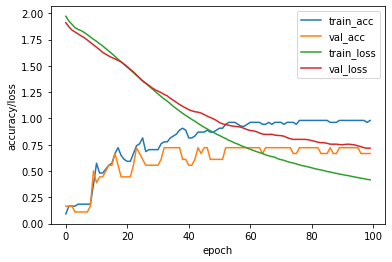

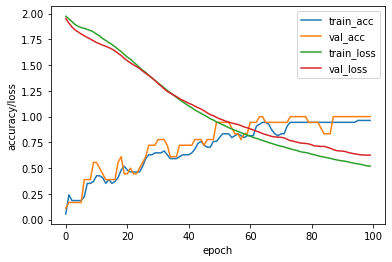

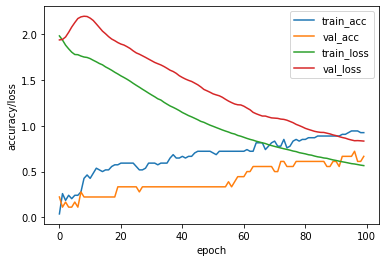

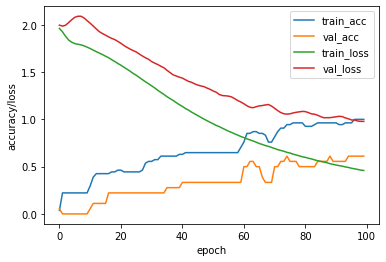

In [50]:
for history in histories4:
    pp.plot_hist(history)

In [14]:
net4.save('enb38-4.h5')

<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
